In [18]:
!pip install pandas
!pip install fix_yahoo_finance
!pip install pandas-datareader
!pip install matplotlib

import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt 


     |████████████████████████████████| 13.0MB 112kB/s eta 0:00:01    |████████████▊                   | 5.2MB 2.2MB/s eta 0:00:04B 2.2MB/s eta 0:00:03     |█████████████████████▉          | 8.9MB 2.2MB/s eta 0:00:02     |███████████████████████▋        | 9.6MB 2.2MB/s eta 0:00:020:01
     |████████████████████████████████| 92kB 3.3MB/s  eta 0:00:01     |██████████████████              | 51kB 11.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 20.2MB/s eta 0:00:01


In [24]:
vod = yf.Ticker("VOD")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [25]:
vod.info

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'EQUITY',
 'quoteSourceName': 'Nasdaq Real Time Price',
 'currency': 'USD',
 'regularMarketPrice': 16.145,
 'regularMarketTime': 1557938663,
 'regularMarketChange': -0.1949997,
 'regularMarketOpen': 16.25,
 'regularMarketDayHigh': 16.29,
 'regularMarketDayLow': 16.11,
 'regularMarketVolume': 5935643,
 'shortName': 'Vodafone Group Plc',
 'twoHundredDayAverageChangePercent': -0.14658327,
 'priceHint': 2,
 'marketState': 'REGULAR',
 'gmtOffSetMilliseconds': -14400000,
 'esgPopulated': False,
 'tradeable': True,
 'market': 'us_market',
 'exchange': 'NMS',
 'exchangeDataDelayedBy': 0,
 'regularMarketChangePercent': -1.1933886,
 'regularMarketDayRange': '16.11 - 16.29',
 'regularMarketPreviousClose': 16.34,
 'bid': 16.14,
 'ask': 16.14,
 'bidSize': 215,
 'askSize': 40,
 'messageBoardId': 'finmb_324490',
 'fullExchangeName': 'NasdaqGS',
 'longName': 'Vodafone Group Plc',
 'financialCurrency': 'EUR',
 'averageDailyVolume3Month': 4648642,
 'a

In [13]:

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("VOD", start="2019-01-01", end="2019-05-15")

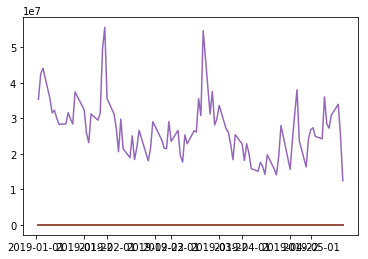

In [22]:
plt.plot(data)